In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
frames=np.load("outfile_x.npy")
y_train=np.load("outfile_y.npy")

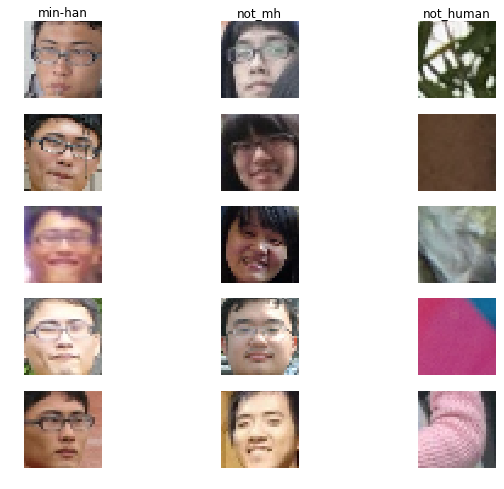

In [3]:
classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(frames[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [4]:
arr = np.arange(len(frames))
np.random.shuffle(arr)
x_train=frames[arr]
y_train=y_train[arr].astype('uint8')

x_train_temp = np.empty((x_train.shape[0],x_train.shape[3],x_train.shape[1],x_train.shape[2]))
print "there are "+ str(x_train.shape[0]) + " images"
for j in range(x_train.shape[0]):
    for i in range(x_train.shape[3]):
        x_train_temp[j,i,:,:]=x_train[j,:,:,i]
x_train=x_train_temp

data={
  'X_train': x_train[:int(len(x_train)*0.8)],
  'y_train': y_train[:int(len(x_train)*0.8)],
  'X_val': x_train[int(len(x_train)*0.8):],
  'y_val': y_train[int(len(x_train)*0.8):],
}

there are 963 images


In [5]:
#this cell will load pretrained model
import pickle 
with open('Whimh_model.dkl','rb') as input:
    model=pickle.load(input)

In [6]:
#using models maked in cs231n assignment2
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

In [7]:
#over fitting at small data
from cs231n.classifiers.cnn import *

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-2)

#model = ConvNet(hidden_dims=[32,32,32],dropout=0,use_batchnorm=False,reg=0.001,pool_period=3)

solver = Solver(model, small_data,
                num_epochs=12, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=10)
solver.train()


(Iteration 1 / 12) loss: 2.268667
(Epoch 1 / 12) train acc: 0.600000; val_acc: 0.538860
(Epoch 2 / 12) train acc: 0.600000; val_acc: 0.549223
(Epoch 3 / 12) train acc: 0.760000; val_acc: 0.601036
(Epoch 4 / 12) train acc: 0.780000; val_acc: 0.663212
(Epoch 5 / 12) train acc: 0.840000; val_acc: 0.647668
(Epoch 6 / 12) train acc: 0.860000; val_acc: 0.668394
(Epoch 7 / 12) train acc: 0.880000; val_acc: 0.683938
(Epoch 8 / 12) train acc: 0.920000; val_acc: 0.678756
(Epoch 9 / 12) train acc: 0.980000; val_acc: 0.704663
(Epoch 10 / 12) train acc: 0.900000; val_acc: 0.730570
(Iteration 11 / 12) loss: 0.218349
(Epoch 11 / 12) train acc: 0.980000; val_acc: 0.735751
(Epoch 12 / 12) train acc: 0.980000; val_acc: 0.761658


In [8]:
#model = ConvNet(hidden_dims=[64,64,128,128,256,256,512,512],hidden_dim=[4096,4096,1000],
#                dropout=0.6,use_batchnorm=True,reg=1e-4,pool_period=2)
#model = ConvNet(hidden_dims=[16],hidden_dim=[15],
#                dropout=0.1,use_batchnorm=False,reg=0.5,pool_period=2)
model = ConvNet(hidden_dims=[64,128,256],hidden_dim=[1024,500],
                dropout=0.5,use_batchnorm=False,reg=2*1e-4,pool_period=1,num_classes=3)


In [9]:
solver = Solver(model, data,
                num_epochs=15, batch_size=60,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=30)
solver.train()

(Iteration 1 / 180) loss: 1.140645
(Epoch 0 / 15) train acc: 0.551948; val_acc: 0.544041
(Epoch 1 / 15) train acc: 0.551948; val_acc: 0.544041
(Epoch 2 / 15) train acc: 0.551948; val_acc: 0.544041
(Iteration 31 / 180) loss: 1.082579
(Epoch 3 / 15) train acc: 0.551948; val_acc: 0.544041
(Epoch 4 / 15) train acc: 0.551948; val_acc: 0.544041
(Epoch 5 / 15) train acc: 0.576623; val_acc: 0.575130
(Iteration 61 / 180) loss: 0.926288
(Epoch 6 / 15) train acc: 0.623377; val_acc: 0.611399
(Epoch 7 / 15) train acc: 0.670130; val_acc: 0.621762
(Iteration 91 / 180) loss: 0.719124
(Epoch 8 / 15) train acc: 0.685714; val_acc: 0.658031
(Epoch 9 / 15) train acc: 0.741558; val_acc: 0.730570
(Epoch 10 / 15) train acc: 0.779221; val_acc: 0.823834
(Iteration 121 / 180) loss: 0.642399
(Epoch 11 / 15) train acc: 0.729870; val_acc: 0.735751
(Epoch 12 / 15) train acc: 0.797403; val_acc: 0.823834
(Iteration 151 / 180) loss: 0.444567
(Epoch 13 / 15) train acc: 0.827273; val_acc: 0.839378
(Epoch 14 / 15) train a

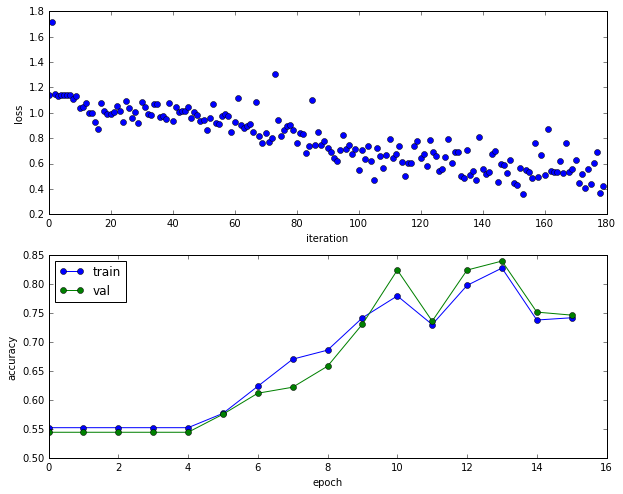

In [10]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          105
(not_human, not_human)     57
(min-han, mh_not)          23
(not_human, mh_not)         8
dtype: int64


In [12]:
solver = Solver(model, data,
                num_epochs=15, batch_size=60,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5*1e-4,
                },
                verbose=True, print_every=30)
solver.train()

(Iteration 1 / 180) loss: 0.603044
(Epoch 0 / 15) train acc: 0.807792; val_acc: 0.834197
(Epoch 1 / 15) train acc: 0.811688; val_acc: 0.834197
(Epoch 2 / 15) train acc: 0.825974; val_acc: 0.844560
(Iteration 31 / 180) loss: 0.503511
(Epoch 3 / 15) train acc: 0.828571; val_acc: 0.854922
(Epoch 4 / 15) train acc: 0.820779; val_acc: 0.829016
(Epoch 5 / 15) train acc: 0.836364; val_acc: 0.839378
(Iteration 61 / 180) loss: 0.452016
(Epoch 6 / 15) train acc: 0.825974; val_acc: 0.829016
(Epoch 7 / 15) train acc: 0.842857; val_acc: 0.849741
(Iteration 91 / 180) loss: 0.590897
(Epoch 8 / 15) train acc: 0.870130; val_acc: 0.860104
(Epoch 9 / 15) train acc: 0.885714; val_acc: 0.875648
(Epoch 10 / 15) train acc: 0.888312; val_acc: 0.839378
(Iteration 121 / 180) loss: 0.342177
(Epoch 11 / 15) train acc: 0.896104; val_acc: 0.865285
(Epoch 12 / 15) train acc: 0.889610; val_acc: 0.818653
(Iteration 151 / 180) loss: 0.391350
(Epoch 13 / 15) train acc: 0.888312; val_acc: 0.870466
(Epoch 14 / 15) train a

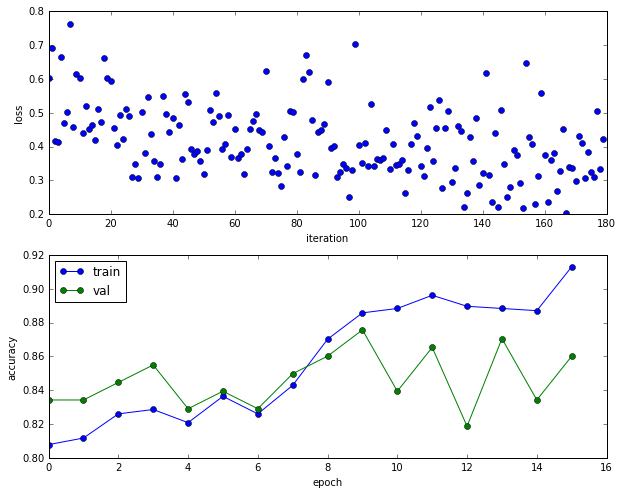

In [13]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [14]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          98
(not_human, not_human)    63
(min-han, mh_not)         15
(min-han, min-han)         8
(mh_not, min-han)          4
(mh_not, not_human)        3
(not_human, mh_not)        2
dtype: int64


In [15]:
solver = Solver(model, data,
                num_epochs=30, batch_size=60,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=30)
solver.train()

(Iteration 1 / 360) loss: 0.378953
(Epoch 0 / 30) train acc: 0.892208; val_acc: 0.875648
(Epoch 1 / 30) train acc: 0.884416; val_acc: 0.865285
(Epoch 2 / 30) train acc: 0.883117; val_acc: 0.870466
(Iteration 31 / 360) loss: 0.268694
(Epoch 3 / 30) train acc: 0.890909; val_acc: 0.844560
(Epoch 4 / 30) train acc: 0.898701; val_acc: 0.844560
(Epoch 5 / 30) train acc: 0.914286; val_acc: 0.860104
(Iteration 61 / 360) loss: 0.381068
(Epoch 6 / 30) train acc: 0.910390; val_acc: 0.870466
(Epoch 7 / 30) train acc: 0.903896; val_acc: 0.860104
(Iteration 91 / 360) loss: 0.460823
(Epoch 8 / 30) train acc: 0.911688; val_acc: 0.860104
(Epoch 9 / 30) train acc: 0.916883; val_acc: 0.860104
(Epoch 10 / 30) train acc: 0.915584; val_acc: 0.870466
(Iteration 121 / 360) loss: 0.323104
(Epoch 11 / 30) train acc: 0.907792; val_acc: 0.865285
(Epoch 12 / 30) train acc: 0.910390; val_acc: 0.865285
(Iteration 151 / 360) loss: 0.493039
(Epoch 13 / 30) train acc: 0.910390; val_acc: 0.854922
(Epoch 14 / 30) train a

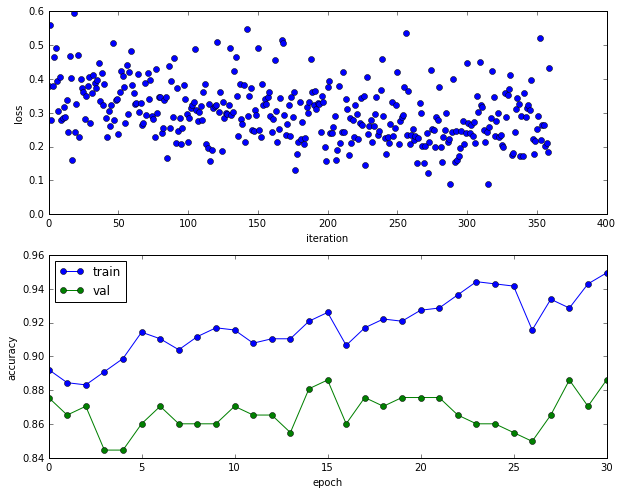

In [16]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          96
(not_human, not_human)    64
(min-han, mh_not)         12
(min-han, min-han)        11
(mh_not, min-han)          8
(not_human, mh_not)        1
(mh_not, not_human)        1
dtype: int64


In [18]:
solver = Solver(model, data,
                num_epochs=30, batch_size=60,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5*1e-5,
                },
                verbose=True, print_every=30)
solver.train()

(Iteration 1 / 360) loss: 0.344213
(Epoch 0 / 30) train acc: 0.920779; val_acc: 0.896373
(Epoch 1 / 30) train acc: 0.927273; val_acc: 0.880829
(Epoch 2 / 30) train acc: 0.925974; val_acc: 0.875648
(Iteration 31 / 360) loss: 0.306755
(Epoch 3 / 30) train acc: 0.915584; val_acc: 0.854922
(Epoch 4 / 30) train acc: 0.927273; val_acc: 0.844560
(Epoch 5 / 30) train acc: 0.929870; val_acc: 0.875648
(Iteration 61 / 360) loss: 0.243932
(Epoch 6 / 30) train acc: 0.931169; val_acc: 0.870466
(Epoch 7 / 30) train acc: 0.933766; val_acc: 0.870466
(Iteration 91 / 360) loss: 0.314424
(Epoch 8 / 30) train acc: 0.931169; val_acc: 0.875648
(Epoch 9 / 30) train acc: 0.932468; val_acc: 0.875648
(Epoch 10 / 30) train acc: 0.923377; val_acc: 0.870466
(Iteration 121 / 360) loss: 0.407733
(Epoch 11 / 30) train acc: 0.920779; val_acc: 0.860104
(Epoch 12 / 30) train acc: 0.940260; val_acc: 0.870466
(Iteration 151 / 360) loss: 0.335144
(Epoch 13 / 30) train acc: 0.944156; val_acc: 0.870466
(Epoch 14 / 30) train a

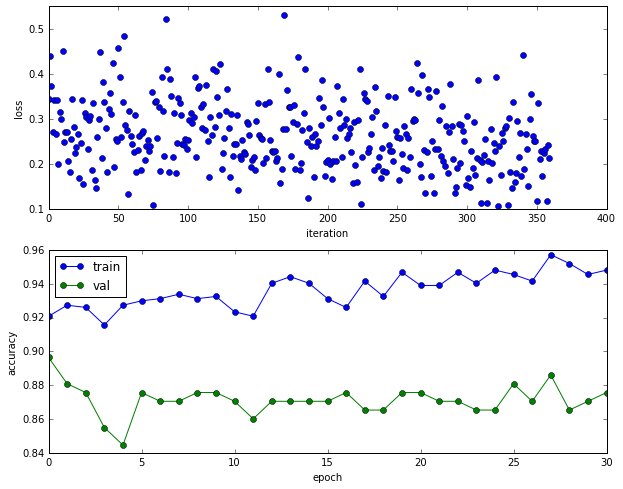

In [19]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [20]:
#using model to predict Validation_set
test_result=model.loss(data['X_val'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_val'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          98
(not_human, not_human)    64
(min-han, mh_not)         12
(min-han, min-han)        11
(mh_not, min-han)          6
(not_human, mh_not)        1
(mh_not, not_human)        1
dtype: int64


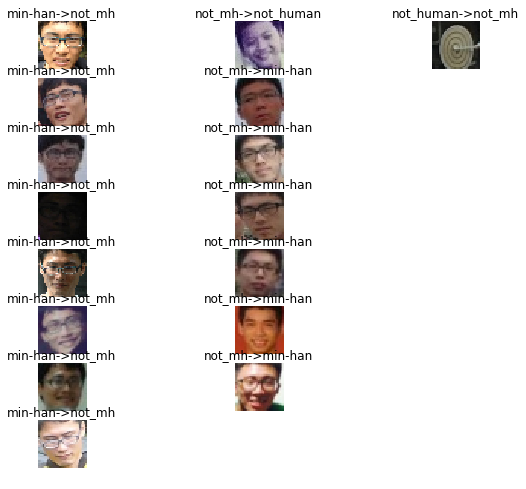

In [21]:
#visualize validation results
preIdx=np.argmax(test_result, axis=1)
wrongIdx=np.where(preIdx!=data['y_val'])
imgTemp=data['X_val'][wrongIdx]
imgLabel=data['y_val'][wrongIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 8
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    try:
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
    except:
        pass
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        try:
            plt.imshow(imgTemp[idx].astype('uint8'))
        except :
            pass
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[wrongIdx][idx]])
plt.show()

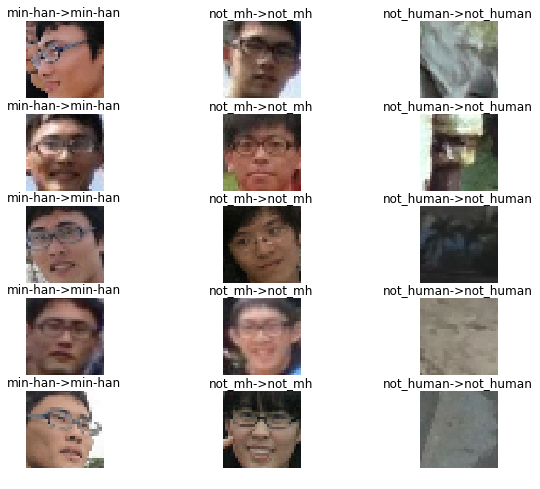

In [22]:
#visualize those predicted correctly
preIdx=np.argmax(test_result, axis=1)
trueIdx=np.where(preIdx==data['y_val'])
imgTemp=data['X_val'][trueIdx]
imgLabel=data['y_val'][trueIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgTemp[idx].astype('uint8'))
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[trueIdx][idx]])
plt.show()

In [23]:
#using model to predict training set
test_result=model.loss(data['X_train'])
import pandas
clasName=['min-han','mh_not','not_human']
pairVal=zip(data['y_train'],np.argmax(test_result, axis=1))
ps = pandas.Series([(clasName[i[0]],clasName[i[1]]) for i in pairVal])
counts = ps.value_counts()
print "ground_truth v.s. predict"
print counts

ground_truth v.s. predict
(mh_not, mh_not)          395
(not_human, not_human)    254
(min-han, min-han)         60
(min-han, mh_not)          23
(mh_not, min-han)          16
(mh_not, not_human)        14
(not_human, mh_not)         6
(min-han, not_human)        2
dtype: int64


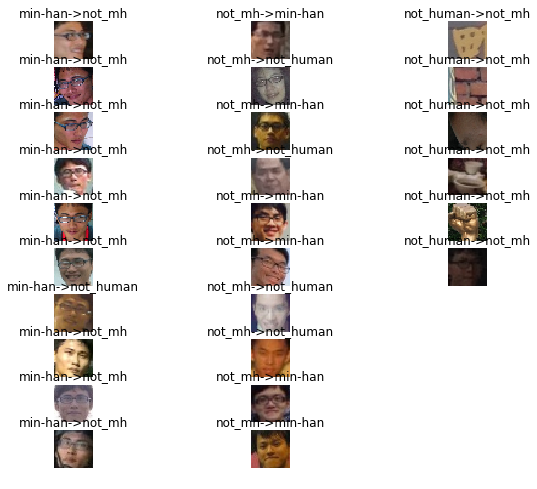

In [24]:
preIdx=np.argmax(test_result, axis=1)
wrongIdx=np.where(preIdx!=data['y_train'])
imgTemp=data['X_train'][wrongIdx]
imgLabel=data['y_train'][wrongIdx]

x_train_temp = np.empty((imgTemp.shape[0],imgTemp.shape[2],imgTemp.shape[3],imgTemp.shape[1]))
for j in range(imgTemp.shape[0]):
    for i in range(imgTemp.shape[1]):
        x_train_temp[j,:,:,i]=imgTemp[j,i,:,:]
imgTemp=x_train_temp

classes = ['min-han','not_mh','not_human']
num_classes = 3
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(imgLabel == y)
    try:
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
    except:
        pass
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        try:
            plt.imshow(imgTemp[idx].astype('uint8'))
        except :
            pass
        plt.axis('off')
        #if i == 0:
        plt.title(cls+"->"+classes[preIdx[wrongIdx][idx]])
plt.show()

In [25]:
with open('Whimh_model.dkl','wb') as output:
    pickle.dump(model,output,pickle.HIGHEST_PROTOCOL)